# **A. PERKENALAN**

Nama    : Al Izhar Iqrami

Batch   : 011 Data Science Hacktive8

# **B. IMPORT PUSTAKA YANG DIBUTUHKAN**

*Mengimport library yang akan digunakan untuk menyelesaikan project yang diberikan*

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **C. DATA LOADING**

**Menampilkan gambar ke halaman kerja python menggunakan library matplotlib dan disimpan ke variabel image**

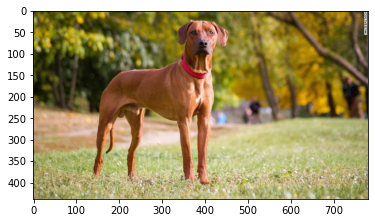

In [68]:
image = plt.imread('dog.jpg')
plt.imshow(image)

# **D. DATA CLEANING**

Dalam mengconvert 3-D array ke 2-D array dapat menggunakan 2 cara :

1. Mengambil salah satu cannel warna (R/G/B)

2. Kombinasikan 3 channel warna menjadi channel grayscale.

**Adapun dalam pengolahan ini saya menggunakan cara yang ke 2**

**Gambaran cara 1 mengconvert 3-D array menjadi 2-D array dengan mengambil salah satu channel warna (R/G/B)**

In [69]:
Red = image[:,:,0]
Green = image[:,:,1]
Blue = image[:,:,2]

print('Shape R:',Red.shape)
print('Shape G:',Green.shape)
print('Shape B:',Blue.shape)

Shape R: (438, 780)
Shape G: (438, 780)
Shape B: (438, 780)


**Gambaran cara 2 mengconvert 3D-array menjadi 2D array dengan cara mengkombinasikan 3 channel warna**

In [70]:
image_grey = 0.299*Red + 0.587*Green + 0.114*Blue
image_grey

array([[ 84.751,  85.349,  82.605, ...,  40.129,  37.787,  50.787],
       [ 75.751,  75.751,  74.893, ...,  38.129,  55.901,  28.787],
       [ 64.267,  64.751,  65.121, ...,  47.77 ,  35.901,  59.912],
       ...,
       [150.056, 143.583, 134.181, ..., 136.133, 135.133, 131.133],
       [148.583, 141.583, 131.822, ..., 140.888, 138.66 , 133.66 ],
       [148.811, 141.811, 130.811, ..., 146.116, 143.116, 136.116]])

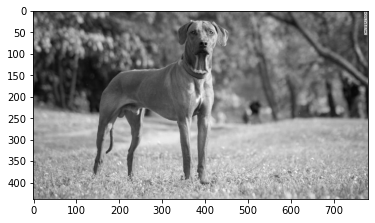

In [71]:
plt.imshow(image_grey, cmap='gray')

# **E. IMAGE PROCESSING**

**1. Menghitung vektor gradien (turunan parsial) masing-masing pixel untuk sumbu x dan y**

In [72]:
image_dx,image_dy = np.gradient(image_grey)

**Menampilkan turunan parsial terhadap sumbu x**

In [73]:
image_dx

array([[ -9.    ,  -9.598 ,  -7.712 , ...,  -2.    ,  18.114 , -22.    ],
       [-10.242 , -10.299 ,  -8.742 , ...,   3.8205,  -0.943 ,   4.5625],
       [ -8.742 ,  -9.    ,  -7.886 , ..., 107.2385, -13.886 ,  20.1765],
       ...,
       [ -0.7365,  -2.242 ,  -2.6795, ...,   1.9915,   1.3775,   0.8775],
       [ -0.6225,  -0.886 ,  -1.685 , ...,   4.9915,   3.9915,   2.4915],
       [  0.228 ,   0.228 ,  -1.011 , ...,   5.228 ,   4.456 ,   2.456 ]])

**Menampilkan turunan parsial terhadap sumbu y**

In [74]:
image_dy

array([[  0.598 ,  -1.073 ,  -2.63  , ...,  -1.6055,   5.329 ,  13.    ],
       [  0.    ,  -0.429 ,  -0.831 , ...,   5.8375,  -4.671 , -27.114 ],
       [  0.484 ,   0.427 ,   0.6635, ...,  -3.1625,   6.071 ,  24.011 ],
       ...,
       [ -6.473 ,  -7.9375,  -9.3805, ...,   1.2365,  -2.5   ,  -4.    ],
       [ -7.    ,  -8.3805,  -8.3805, ...,   0.386 ,  -3.614 ,  -5.    ],
       [ -7.    ,  -9.    ,  -8.8805, ...,  -0.3205,  -5.    ,  -7.    ]])

**Melihat visualisai menggunakan matplotlib dari tiap nilai pixel mulai dari gambar asli, gray image, turunan sumbu x dan turunan sumbu y**

Text(0.5, 1.0, 'Gray Image_dy')

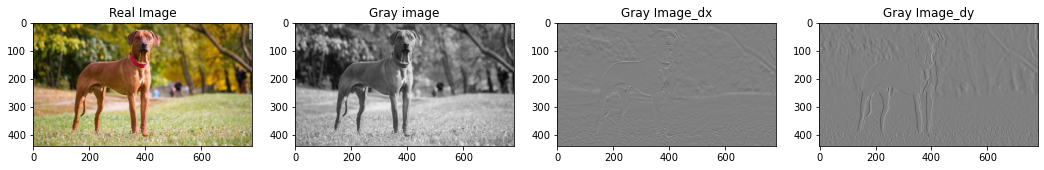

In [75]:
fig, ax = plt.subplots(ncols=4,figsize=(18,8))

ax[0].imshow(image)
ax[0].set_title('Real Image')

ax[1].imshow(image_grey, cmap='gray')
ax[1].set_title('Gray image')

ax[2].imshow(image_dx, cmap='gray')
ax[2].set_title('Gray Image_dx')             # Menangkap invormasi horizontal

ax[3].imshow(image_dy, cmap='gray')
ax[3].set_title('Gray Image_dy')             # Menangkap invormasi vertikal

**2. Menghitung gradient magnitude tiap pixel dengan rumus sesuai instrutions**

**Menghitung gradien magnitude berdasarkan turunan parsial dari sumbu x dan sumbu y**

In [76]:
grad_mag = np.sqrt((image_dx**2)+(image_dy**2))
grad_mag

array([[  9.01984501,   9.65779131,   8.14811905, ...,   2.56468911,
         18.88161108,  25.55386468],
       [ 10.242     ,  10.30793102,   8.78140792, ...,   6.97657699,
          4.76523766,  27.49518871],
       [  8.75538806,   9.0101237 ,   7.91386304, ..., 107.28512147,
         15.15513236,  31.36270513],
       ...,
       [  6.51476487,   8.24805857,   9.75569067, ...,   2.34414259,
          2.85438369,   4.09511981],
       [  7.02762451,   8.42720453,   8.5482165 , ...,   5.00640273,
          5.38452117,   5.5863738 ],
       [  7.00371216,   9.00288754,   8.93786335, ...,   5.23781484,
          6.69745743,   7.4183513 ]])

**Memvisualisasikan hasil grad_mag**

Text(0.5, 1.0, 'grad_mag visualization')

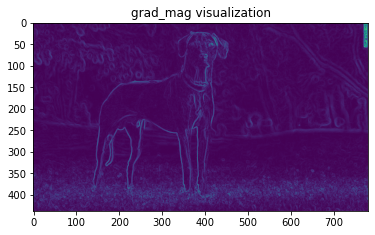

In [77]:
plt.imshow(grad_mag)
plt.title('grad_mag visualization')

**3. Jika nilai magnitude melebihi angka treshold, maka edge terdeteksi (Biasnya threshold ~ 30**)

Membandingkan gradien magnitude dengan nilai treshold 20, 30 dan 40. Jika grad_mag <= treshold maka akan diubah ke nilai 1 dan jika nilai grad_mag > nilai_treshold akan diubah menjadi 0

**Kasus 1 dengan nilai trshold = 20**

Text(0.5, 1.0, 'edge1 visualization')

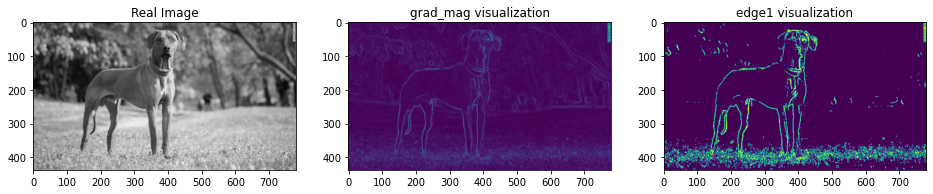

In [78]:
nilai_trshold = 20
edge1 = np.where(grad_mag > nilai_trshold, 1,0)

fig, ax = plt.subplots(ncols=3,figsize=(16,8))

ax[0].imshow(image_grey, cmap='gray')
ax[0].set_title('Real Image')

ax[1].imshow(grad_mag)
ax[1].set_title('grad_mag visualization')

ax[2].imshow(edge1)
ax[2].set_title('edge1 visualization')

**Kasus 2 dengan nilai trshold = 30**

Text(0.5, 1.0, 'edge2 visualization')

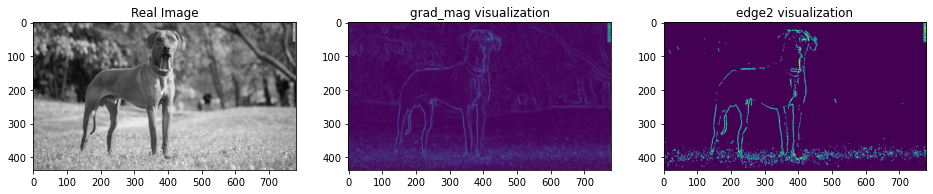

In [79]:
nilai_trshold = 30
edge2 = np.where(grad_mag > nilai_trshold, 1,0)

fig, ax = plt.subplots(ncols=3,figsize=(16,8))

ax[0].imshow(image_grey, cmap='gray')
ax[0].set_title('Real Image')

ax[1].imshow(grad_mag)
ax[1].set_title('grad_mag visualization')

ax[2].imshow(edge2)
ax[2].set_title('edge2 visualization')

**Kasus 3 dengan nilai trshold = 40**

Text(0.5, 1.0, 'edge3 visualization')

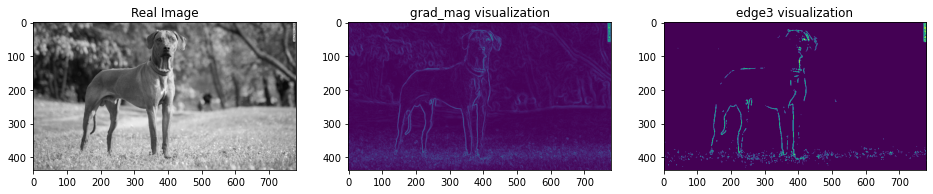

In [80]:
nilai_trshold = 40
edge3 = np.where(grad_mag > nilai_trshold, 1,0)

fig, ax = plt.subplots(ncols=3,figsize=(16,8))

ax[0].imshow(image_grey, cmap='gray')
ax[0].set_title('Real Image')

ax[1].imshow(grad_mag)
ax[1].set_title('grad_mag visualization')

ax[2].imshow(edge3)
ax[2].set_title('edge3 visualization')

**Gabungan visualisai edge dengan nilai trshold yang berbeda**

Text(0.5, 1.0, 'edge3 visualization\n nilai trshold = 40')

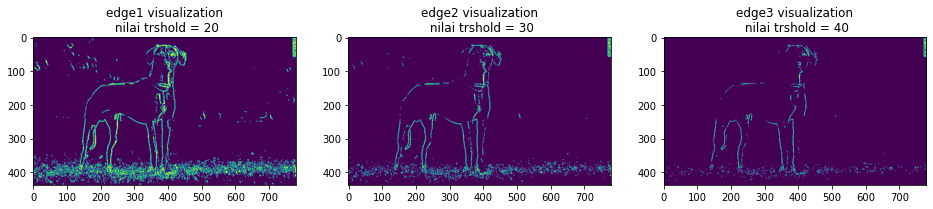

In [86]:
fig, ax = plt.subplots(ncols=3,figsize=(16,8))

ax[0].imshow(edge1)
ax[0].set_title('edge1 visualization\n nilai trshold = 20')

ax[1].imshow(edge2)
ax[1].set_title('edge2 visualization\n nilai trshold = 30')

ax[2].imshow(edge3)
ax[2].set_title('edge3 visualization\n nilai trshold = 40')

**4. Buatlah sebuah matriks dengan nilai apapun yang bersesuaian dengan ukuran gambar dan sesuai dengan aturan perkalian matriks**

**Melihat ukuran edge2 yang memiliki nilai treshold terbaik**

In [82]:
edge1.shape

(438, 780)

**Membuat sebuah bilangan random dan ukuranya disesuaikan dengan edge2 agar dapat dilakukan perkalian matriks**

In [83]:
bil_random = np.random.rand(780,438)
bil_random.shape

(780, 438)

**Mengalikan edge2 dengan bilangan random yang telah dibuat dan disimpan ke veriabel image1** 

In [84]:
image1 = edge2@bil_random
image1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.90507729, 2.99186678, 5.08484043, ..., 3.40632341, 3.11943309,
        3.31333788],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Menampilkan visualisasi (image1) berdasarkan hasil perkalian matriks** 

Text(0.5, 1.0, 'Image1 visualization')

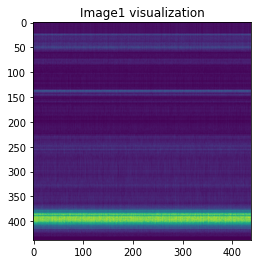

In [85]:
plt.imshow(image1)
plt.title('Image1 visualization')

# **F. HASIL DAN KESIMPULAN**

- Berdasarkan visualisai edge maka menurut saya hasil terbaik ialah dengan nilai treshold 20. Hal ini dikarenakan objek pada gambar terlihat begitu jelas. Sedangkan untuk nilai treshold 40 objek pada gambar terlihat tidak begitu jelas dikarenakan garis pada objek putus-putus

- Untuk melakukan image precessing diperlukan gradien (turunan pertama) dari pixel gambar yang ingin diteliti.

- Hasil perkalian nilai edge terbaik dengan suatu bilangan random (tidak berdasarkan nilai gradien) memperlihatkan hasil visualisasi yang tidak teratur dan sulit untuk melihat objek pada gambar asli